In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

Creating a new set of files in order to make a smaller dataset. With a problem as simple as this, datasets on the order of ~1000s is only needed arguably. 

Below I am creating files:
- Train
- Test
- Validation

In [2]:
import os,shutil

data = 'D:\Datasets'
base_dir = 'D:\Datasets\cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:\\Datasets\\cats_and_dogs_small'

### In each of these files I will create a cats and dogs folder containing the images picked at random. 

using 2000 images: 

 - 50% for training
 - 25% test 
 - 25% validaiton



In [1]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

NameError: name 'os' is not defined

In [24]:
import numpy as np
grab_random= np.random.randint(1,10000,2000) 

grab_random[0:10]

array([8205, 9708, 6113, 4695, 9935,  586, 6881, 3046,  719, 6111])

In [25]:
directory = 'D:\\Datasets\\train'
file_name = ['cat.{}.jpg.'.format(i) for i in grab_random[0:1000]]
for item in file_name:
    source = os.path.join(directory,item)
    destination= os.path.join(train_cats_dir,item)
    shutil.copyfile(source,destination)
file_name = ['cat.{}.jpg.'.format(i) for i in grab_random[1000:1500]]
for item in file_name:
    source = os.path.join(directory,item)
    destination= os.path.join(validation_cats_dir,item)
    shutil.copyfile(source,destination)
file_name = ['cat.{}.jpg.'.format(i) for i in grab_random[1500:2000]]
for item in file_name:
    source = os.path.join(directory,item)
    destination= os.path.join(test_cats_dir,item)
    shutil.copyfile(source,destination)
    """
    Doing the same but for dogs.
    """
file_name = ['dog.{}.jpg.'.format(i) for i in grab_random[0:1000]]
for item in file_name:
    source = os.path.join(directory, item)
    destination = os.path.join(train_dogs_dir, item)
    shutil.copyfile(source, destination)
file_name = ['dog.{}.jpg.'.format(i) for i in grab_random[1000:1500]]
for item in file_name:
    source = os.path.join(directory, item)
    destination = os.path.join(validation_dogs_dir, item)
    shutil.copyfile(source, destination)
    
file_name = ['dog.{}.jpg.'.format(i) for i in grab_random[1500:2000]]
for item in file_name:
    source = os.path.join(directory, item)
    destination = os.path.join(test_dogs_dir, item)
    shutil.copyfile(source, destination)


In [2]:
import os,shutil
original_dataset_dir = 'D:\\Datasets'
base_dir = 'D:\\Datasets\\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

%matplotlib inline


In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 951
total training dog images: 951
total validation cat images: 489
total validation dog images: 489
total test cat images: 485
total test dog images: 485


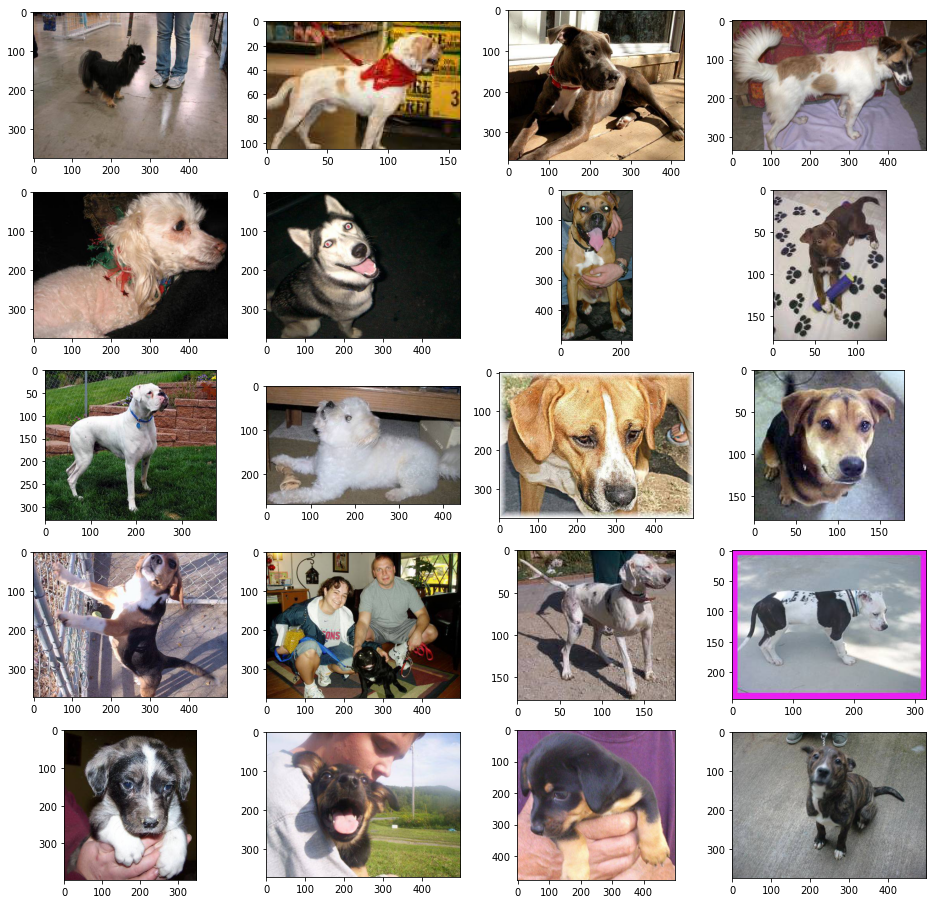

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

os.chdir('D:\\Datasets\\cats_and_dogs_small\\train\\dogs')
list_of_images =os.listdir(train_dogs_dir)

w=5
h=5
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = mpimg.imread(list_of_images[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        9

In [7]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=0.001), #decrease learning rate
             metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),
batch_size=20, class_mode='binary')

Found 1902 images belonging to 2 classes.
Found 978 images belonging to 2 classes.


In [97]:
history = model.fit(
train_generator,
steps_per_epoch=90, # N.B 951 images for some weird reason (951 + 951) / 20
epochs=15,
validation_data=validation_generator,
validation_steps=46) #951/batch_size 20 

Epoch 1/15
90/90 [==============================] - 18s 152ms/step - loss: 0.7369 - accuracy: 0.4932 - val_loss: 0.6884 - val_accuracy: 0.5250
Epoch 2/15
90/90 [==============================] - 10s 112ms/step - loss: 0.6938 - accuracy: 0.5795 - val_loss: 0.6490 - val_accuracy: 0.6239
Epoch 3/15
90/90 [==============================] - 10s 111ms/step - loss: 0.6586 - accuracy: 0.6196 - val_loss: 0.6085 - val_accuracy: 0.6783
Epoch 4/15
90/90 [==============================] - 10s 113ms/step - loss: 0.6026 - accuracy: 0.6677 - val_loss: 0.5523 - val_accuracy: 0.7174
Epoch 5/15
90/90 [==============================] - 10s 114ms/step - loss: 0.5524 - accuracy: 0.7185 - val_loss: 0.5620 - val_accuracy: 0.7033
Epoch 6/15
90/90 [==============================] - 11s 118ms/step - loss: 0.5008 - accuracy: 0.7618 - val_loss: 0.5632 - val_accuracy: 0.7065
Epoch 7/15
90/90 [==============================] - 12s 136ms/step - loss: 0.4434 - accuracy: 0.7924 - val_loss: 0.5472 - val_accuracy: 0.7304

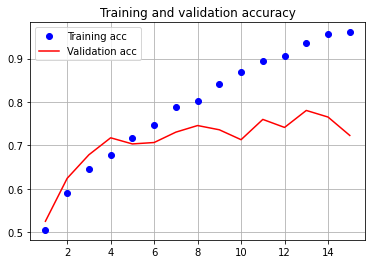

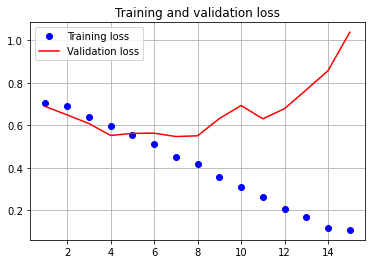

In [98]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

Very apparent overfitting occuring. Around epoch 4 validation starts to plateau while training continues to increase. Too few sample to learn from. --> Use data augmentation techniques:
- rotation_range: assign random rotation of images
- Width_shift/height_shift:randomly translate pictures horizontally vertically, leaving "padding"
-shear + zoom, shear + zoom transformations
- horizontal_flip
- fill_mode creating new pixels

In [9]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

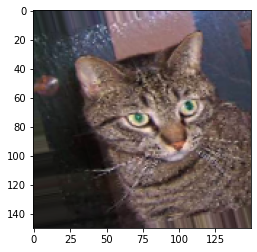

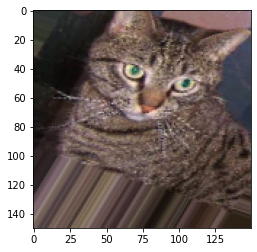

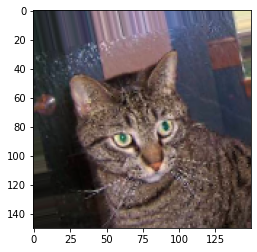

In [10]:
from tensorflow.keras.preprocessing import image
images = [os.path.join(train_cats_dir,image) for image in os.listdir(train_cats_dir)]
random_image = images[0]
img = image.load_img(random_image,target_size=(150,150))
x = image.img_to_array(img)
x=x.reshape((1,)+ x.shape) #reshape to (1,150,150,3)
i =1 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()
    



In [11]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [12]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) #should not augmnet the test dataset 

In [13]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 1902 images belonging to 2 classes.
Found 978 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
train_generator,
steps_per_epoch=50,
epochs=15,
validation_data=validation_generator,
validation_steps=15)

D:\Anaconda\envs\ML\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
50/50 [==============================] - 21s 294ms/step - loss: 0.6936 - acc: 0.5175 - val_loss: 0.6892 - val_acc: 0.5312
Epoch 2/15
50/50 [==============================] - 12s 230ms/step - loss: 0.6926 - acc: 0.5147 - val_loss: 0.6901 - val_acc: 0.5042s - loss: 0.
Epoch 3/15
50/50 [==============================] - 12s 235ms/step - loss: 0.6903 - acc: 0.5214 - val_loss: 0.6838 - val_acc: 0.5500
Epoch 4/15
50/50 [==============================] - 12s 231ms/step - loss: 0.6888 - acc: 0.5638 - val_loss: 0.6958 - val_acc: 0.4875
Epoch 5/15
50/50 [==============================] - 11s 217ms/step - loss: 0.6866 - acc: 0.5363 - val_loss: 0.6820 - val_acc: 0.5458
Epoch 6/15
50/50 [==============================] - 11s 224ms/step - loss: 0.6786 - acc: 0.5652 - val_loss: 0.6738 - val_acc: 0.5479
Epoch 7/15
50/50 [==============================] - 11s 227ms/step - loss: 0.6758 - acc: 0.5635 - val_loss: 0.6650 - val_acc: 0.5750
Epoch 8/15
50/50 [==============================] - 11s 2

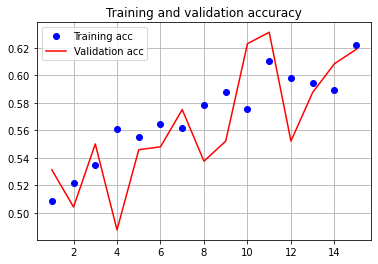

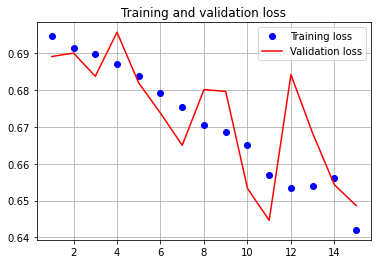

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

Arguably needs more epochs for incresed performance